<a href="https://colab.research.google.com/github/Codeginner/machineLearning-task/blob/main/UTS/UTS-ML_Linear_Regression_Possum_Dataset/UTS-ML_Linear_Regression_Possum_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Gilman Muslih Z**

**NIM: 1103201075**

**Model: Linear Regression**

**Dataset:** https://www.kaggle.com/datasets/abrambeyer/openintro-possum

In [217]:
import pandas as pd # Mengimport library pandas untuk manipulasi dan analisis data tabular
import numpy as np # Mengimport library numpy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt # Mengimport modul pyplot dari library matplotlib untuk membuat visualisasi grafik
import seaborn as sns # Mengimport library seaborn untuk membuat visualisasi statistik yang menarik
from sklearn.model_selection import train_test_split # Fungsi ini digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian
from sklearn.linear_model import LinearRegression # Import model regresi linear untuk memodelkan hubungan linier antara fitur dan variabel target
from sklearn.preprocessing import StandardScaler # Fungsi ini digunakan untuk melakukan penskalaan fitur sehingga distribusi setiap fitur memiliki rata-rata 0 dan deviasi standar 1
from sklearn import metrics # Modul ini berisi berbagai metrik evaluasi yang digunakan untuk mengukur kinerja model

prompt: berikan kode untuk menghubungkan colab dengan google drive untuk mengakses dataset

In [218]:
# Mengimpor library untuk mengakses Google Drive dari Colab
from google.colab import drive

# Menghubungkan Colab dengan Google Drive
drive.mount('/content/drive')

# Path ke folder tempat dataset disimpan di Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/possum (1).csv'

# Membaca dataset menggunakan pandas
df = pd.read_csv(dataset_path)

# Menampilkan beberapa baris pertama dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Kode di atas digunakan untuk menghubungkan Google Colab dengan Google Drive sehingga dapat mengakses dataset yang disimpan di Google Drive dan menampilkan beberapa baris pertama dari dataset untuk memberikan gambaran awal tentang struktur dan isinya.

In [219]:
# Menampilkan informasi tentang dataset menggunakan metode info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


Kode di atas akan memberikan informasi tentang dataset, termasuk tipe data setiap kolom, jumlah nilai non-null, dan penggunaan memori.

 Kode selanjutnya digunakan untuk memperjelas kolom mana saja yang berisi nilai null

 prompt: Tunjukkan kode yang diperlukan untuk mengecek jumlah nilai null (missing values) dalam setiap kolom dari suatu dataset menggunakan pandas.

In [220]:
# Menampilkan jumlah nilai null dalam setiap kolom dataset
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Karena dataset yang lengkap dapat meningkatkan kualitas model machine learning dan analisis statistik, maka selanjutnya isi nilai null (missing values) dalam kolom 'age' dan 'footlgth' dengan nilai rata-rata pada setiap kolom.

prompt: Bagaimana cara mengisi nilai null (missing values) dalam kolom 'age' dan 'footlgth' dengan nilai rata-rata dan kemudian mengecek jumlah nilai null setelah pengisian menggunakan pandas?

In [221]:
# Mengisi nilai null dalam kolom 'age' dan 'footlgth' dengan nilai rata-rata
df['age'] = df['age'].fillna(df['age'].mean())
df['footlgth'] = df['footlgth'].fillna(df['footlgth'].mean())

# Menampilkan jumlah nilai null setelah pengisian
print("Jumlah nilai null setelah pengisian:")
print(df[['age', 'footlgth']].isnull().sum())

Jumlah nilai null setelah pengisian:
age         0
footlgth    0
dtype: int64


Penggunaan nilai rata-rata sering dipilih karena sederhana dan cepat
serta, dengan menyamakan nilai null dengan mean dapat mempertahankan distribusi umum dari kolom tersebut.

Setelah melakukan pengisian kolom yang memiliki nilai null dengan nilai rata-rata pada setiap kolom, lakukan kembali pengecekan pada dataset untuk memastikan sudah tidak ada kolom yang memiliki missing value

In [222]:
# Mengecek kembali jumlah nilai null dalam setiap kolom dataset
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


Selanjutnya, membuat heatmap korelasi antar fitur agar dapat dengan cepat mendapatkan wawasan tentang struktur korelasi dalam dataset, sehingga memudahkan pengambilan keputusan dan interpretasi hasil analisis.

prompt: tunjukkan cara menggunakan seaborn dan matplotlib untuk membuat heatmap korelasi dari DataFrame.

<ipython-input-223-453df4c03098>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


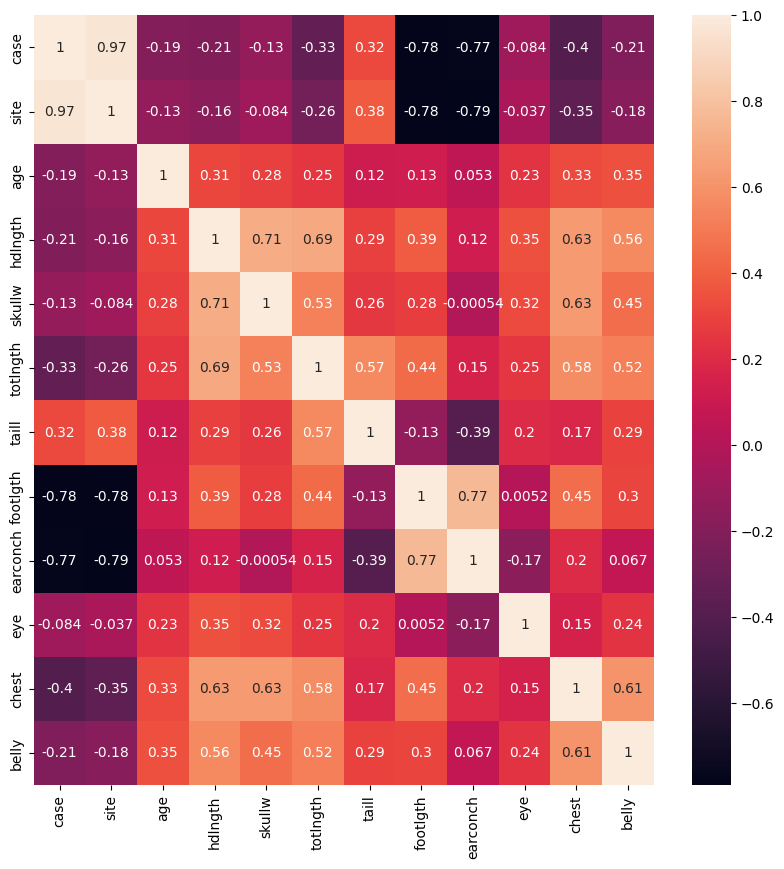

In [223]:
# Menggunakan seaborn dan matplotlib untuk membuat heatmap korelasi
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Selanjutnya menghapus kolom-kolom yang tidak diperlukan dalam melatih model, yaitu kolom "sex" dan "Pop (population)".

prompt: Tunjukkan cara menghapus kolom dari suatu DataFrame menggunakan pandas.

In [224]:
# Menghapus kolom 'Pop' dan 'sex' dari DataFrame
df.drop(labels=['Pop', 'sex'], axis=1, inplace=True)


Setelah memahami hubungan antar fitur-fitur dalam dataset melalui heatmap korelasi, langkah selanjutnya adalah memisahkan fitur dan target dari dataset untuk dapat lebih fokus dalam mengembangkan model yang efektif.

prompt: Bagaimana cara menggunakan pandas untuk memisahkan fitur dan target dari suatu dataset?


In [225]:
# Menggunakan pandas, kita membuat variabel X yang merupakan dataset tanpa kolom 'totlngth'
X = df.drop(labels=['totlngth'], axis=1)

# Menggunakan pandas, kita membuat variabel y yang merupakan kolom 'totlngth' dari dataset
y = df['totlngth']

Selanjutnya, memahami struktur dan isi data untuk memastikan bahwa dataset telah dimuat dengan benar dan siap untuk langkah-langkah berikutnya dalam analisis atau pengembangan model.

prompt: Berikan kode untuk menampilkan dimensi (shape) dari fitur (X) dan target (y) dalam suatu dataset menggunakan pandas, serta menampilkan nilai atau isi dari kedua variabel tersebut.

In [226]:
# Menampilkan dimensi atau bentuk dari variabel X
X.shape

(104, 11)

In [227]:
# Menampilkan dimensi atau bentuk dari variabel y
y.shape

(104,)

In [228]:
# Menampilkan nilai atau isi dari variabel X
X

,case,site,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
0,1,1,8.0,94.1,60.4,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,6.0,92.5,57.6,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,6.0,94.0,60.0,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,6.0,93.2,57.1,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,2.0,91.5,56.3,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1.0,89.5,56.0,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1.0,88.6,54.7,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,6.0,92.4,55.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,4.0,91.5,55.2,36.5,62.9,45.9,15.4,25.0,29.0


In [229]:
# Menampilkan nilai atau isi dari variabel y
y

0      89.0
1      91.5
2      95.5
3      92.0
4      85.5
       ... 
99     81.5
100    82.5
101    89.0
102    82.5
103    89.0
Name: totlngth, Length: 104, dtype: float64

Selanjutnya memisahkan dataset antara data yang akan digunakan untuk melatih dan menguji model. Subset pelatihan digunakan untuk melatih model, sedangkan subset pengujian digunakan untuk menguji dan mengukur performa model. Dengan menggunakan subset pelatihan dan pengujian, pada saat mengembangkan model, dapat mengoptimalkan dan mengevaluasi model dengan lebih baik

prompt: Berikan kode untuk membagi dataset menjadi subset pelatihan dan pengujian

In [230]:
# Memisahkan dataset menjadi subset pelatihan (X_train, y_train) dan subset pengujian (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Selanjutnya melakukan pensklaan fitur karena metode yang digunakan adalah metode regresi linear. Penskalaan fitur adalah langkah yang umumnya diperlukan dalam analisis data dan pengembangan model machine learning. Algoritma machine learning seperti regresi linear, support vector machines, dan k-means clustering dapat mendapatkan manfaat dari penskalaan fitur.

StandardScaler khususnya melakukan penskalaan fitur sehingga distribusi setiap fitur memiliki rata-rata 0 dan deviasi standar 1. Hal ini dapat membantu algoritma yang sensitif terhadap skala untuk berkinerja lebih baik.

prompt: Berikan kode untuk melakukan penskalaan fitur pada subset pelatihan dan pengujian

In [231]:
# Membuat objek StandardScaler
scalar = StandardScaler()

# Melakukan penskalaan fitur pada subset pelatihan (X_train)
X_train_scalar = scalar.fit_transform(X_train)

# Melakukan penskalaan fitur pada subset pengujian (X_test)
X_test_scalar = scalar.transform(X_test)

Setelah melakukan penskalaan pada fitur, selanjutnya memilih dan melatih model. Pemilihan dan pelatihan model adalah langkah penting dalam pengembangan model machine learning. Dalam konteks regresi linear, model ini digunakan untuk memodelkan hubungan linear antara fitur-fitur dan variabel target. Penskalaan fitur yang telah dilakukan sebelumnya, dapat melatih model regresi linear untuk meningkatkan performa dan konvergensi model.

prompt: Berikan kode untuk membuat dan melatih model regresi linear

In [232]:
# Membuat objek LinearRegression
linear = LinearRegression()

# Melatih model regresi linear menggunakan subset pelatihan yang telah di-scala (X_train_scalar dan y_train)
linear.fit(X_train_scalar, y_train)

LinearRegression()

Setelah melatih model regresi linear, selanjutnya uji kinerja model pada subset pengujian yang belum pernah dilihat sebelumnya. Proses ini memberikan gambaran tentang sejauh mana model mampu melakukan prediksi pada data baru.

Penggunaan penskalaan fitur pada subset pengujian (X_test_scalar) memastikan konsistensi skala antara data pelatihan dan pengujian, sehingga model dapat memberikan prediksi yang lebih akurat.

prompt: Berikan kode untuk melakukan prediksi menggunakan model regresi linear

In [233]:
# Melakukan prediksi menggunakan model regresi linear pada subset pengujian yang telah di-scala (X_test_scalar)
y_pred_scalar = linear.predict(X_test_scalar)

Evaluasi model setelah melakukan prediksi adalah langkah kritis untuk memahami seberapa baik model dapat menggeneralisasi pada data baru. Metrik-metrik seperti skor akurasi, MAE, R-squared, dan MSE memberikan wawasan yang berbeda tentang kinerja model.

prompt: Berikan kode untuk menampilkan metrik-metrik evaluasi model seperti skor akurasi, MAE, R-squared, dan MSE

In [234]:
# Menampilkan skor akurasi dari model pada subset pengujian
print(f'Score: {round(linear.score(X_test_scalar, y_test), 4)}\n')

# Menampilkan koefisien dari model regresi linear
print(f'Coefficients: {linear.coef_}\n')

# Menampilkan mean absolute error antara prediksi dan nilai aktual
print(f'mean_absolute_error: {metrics.mean_absolute_error(y_pred_scalar, y_test)}\n')

# Menampilkan R-squared error antara prediksi dan nilai aktual
print(f'R square Error: {metrics.r2_score(y_pred_scalar, y_test)}\n')

# Menampilkan mean squared error antara prediksi dan nilai aktual
print(f'Mean Squared Error: {metrics.mean_squared_error(y_pred_scalar, y_test)}\n')

Score: 0.7013

Coefficients: [-2.00474346  0.48328624 -0.21572193  1.61039087  0.33934846  2.28836246
  0.67797139 -0.41915567 -0.21765964 -0.12681713  0.16102906]

mean_absolute_error: 1.9576030227269556

R square Error: 0.402282779144549

Mean Squared Error: 6.155944476941621



- Akurasi model pada subset pengujian sebesar 70.13% mengindikasikan bahwa model mampu menjelaskan sekitar 70.13% variasi dalam panjang total possum pada data yang tidak terlihat sebelumnya.

- MAE sekitar 1.96 unit, menunjukkan bahwa model memiliki tingkat akurasi yang dapat diterima dalam memprediksi panjang possum.

- R-squared Error sebesar 0.4023 mengindikasikan bahwa model dapat menjelaskan sekitar 40.23% variasi dalam panjang possum. Masih terdapat sejumlah variasi yang tidak dapat dijelaskan oleh model.

- Mean Squared Error (MSE) sebesar 6.1559 mengukur rata-rata dari kuadrat selisih antara prediksi dan nilai aktual. Nilai ini memberikan gambaran tentang sejauh mana model dapat menghasilkan prediksi yang akurat, dan nilai yang lebih rendah diinginkan.

Menguji model regresi linear pada data baru yang belum pernah dilihat sebelumnya. Data baru di-scala menggunakan objek StandardScaler yang sama untuk menjaga konsistensi skala antara data baru dan data yang digunakan selama pelatihan model.

prompt: Berikan kode untuk membuat prediksi total panjang possum berdasarkan model regresi linear yang telah dilatih menggunakan data baru

In [235]:
# Data baru
new_data_values = {
    'case': 105,
    'site': 8,
    'age': 5.0,
    'hdlngth': 89.0,
    'skullw': 58.0,
    'taill': 35.0,
    'footlgth': 80.0,
    'earconch': 50.0,
    'eye': 15.0,
    'chest': 25.0,
    'belly': 30.0
}


# Buat DataFrame baru untuk data baru
new_data = pd.DataFrame([new_data_values], columns=X.columns)

# Scaling fitur-fitur dalam data baru menggunakan objek StandardScaler yang sama
new_data_scaled = scalar.transform(new_data)

# Gunakan model regresi linear yang telah dilatih untuk membuat prediksi
prediction = linear.predict(new_data_scaled)

# Tampilkan hasil prediksi
print(f'Predicted Total Length of Possum: {prediction[0]}')

Predicted Total Length of Possum: 82.0953145517426


Prompt untuk kode selanjutnya: tambahkan visualisasi data setelah prediksi data baru

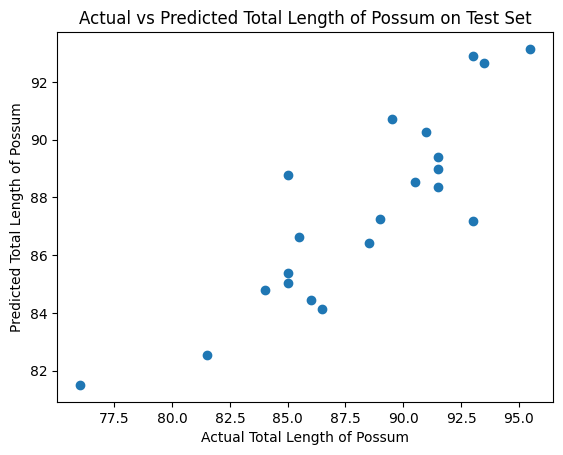

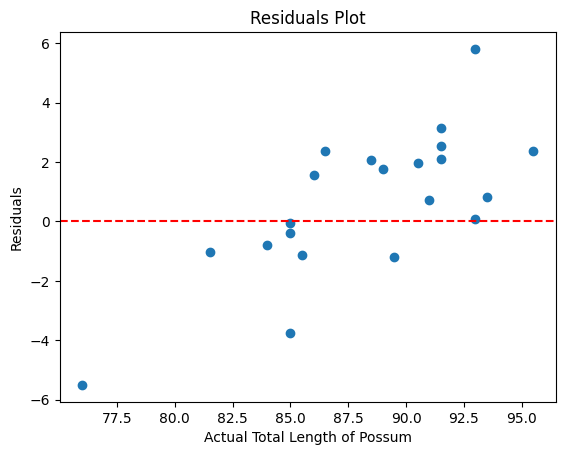

In [239]:
# Visualisasi Perbandingan Hasil Prediksi dengan Nilai Aktual pada Subset Pengujian
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_scalar)
plt.xlabel("Actual Total Length of Possum")
plt.ylabel("Predicted Total Length of Possum")
plt.title("Actual vs Predicted Total Length of Possum on Test Set")
plt.show()

# Analisis Residual
residuals = y_test - y_pred_scalar
plt.scatter(y_test, residuals)
plt.xlabel("Actual Total Length of Possum")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Sebagian besar poin terkonsentrasi di sekitar garis yang akan mewakili prediksi yang sempurna. Namun, ada juga beberapa poin yang menyebar ke atas dan ke bawah dari zona konsentrasi ini, menunjukkan bahwa ada beberapa kesalahan prediksi.

Untuk analisis residual, relatif tersebar secara acak, yang menunjukkan bahwa model mungkin memiliki kecocokan yang baik.